## Выполнить парсинг коллекции данных на Портале открытых данных Правительства Москвы . Выявить показатели в наборе данных

Вариант 9. Земля и имущество.

In [1]:
# import modules
import certifi
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import urllib3
from urllib3 import request
from unicodedata import normalize

In [3]:
# Импорт стандартных пакетов
import pandas as pd

# Для парсинга веб-страниц
import requests as reqs
import urllib.request
from bs4 import BeautifulSoup
import json
import os
import pprint

# Для выполнения операций с регулярными выражениями
import re

[Источник данных - Нежилые помещения, зарегистрированные в собственность города Москвы](https://data.mos.ru/opendata/1022?isDynamic=false&version=4&release=61)

In [20]:
# Импорт стандартных пакетов
import pandas as pd

# Для парсинга веб-страниц
import requests as reqs
import urllib.request
from bs4 import BeautifulSoup
import json
import os
import pprint
from bs4 import BeautifulSoup as bso

# Для выполнения операций с регулярными выражениями
import re

In [21]:
import requests

url = 'https://apidata.mos.ru/v1/datasets/1022/features?api_key=d4a90fd5-f352-4206-a8d7-da61d1e66da0'
headers = {'Accept': 'application/json'}

response = requests.get(url, headers=headers)

In [22]:
print(f"URL: \n\t {response.url}")

URL: 
	 https://apidata.mos.ru/v1/datasets/1022/features?api_key=d4a90fd5-f352-4206-a8d7-da61d1e66da0


In [23]:
print(f"Content type: \n\t {response.headers['content-type']}")

Content type: 
	 application/json


In [24]:
if response.status_code == 200:
    json_data = response.json()  # Преобразуем JSON-ответ в словарь Python

    features = json_data['features']

    # Создаем датафрейм из полученных данных
    df = pd.json_normalize(features)
else:
    print('Запрос вернул статус:', response.status_code)

In [25]:
df

,type,geometry.coordinates,geometry.type,properties.datasetId,properties.attributes.is_deleted,properties.attributes.ID,properties.attributes.Address,properties.attributes.global_id,properties.attributes.AdmArea,properties.attributes.District,...,properties.attributes.ObjectArea,properties.attributes.BuiltYear,properties.attributes.HistoricalAndCulturalHeritageCategory,properties.attributes.ConditionalNumber,properties.attributes.ObjectVid,properties.attributes.ObjectNaznBTI,properties.attributes.ObjectKlass,properties.rowId,properties.versionNumber,properties.releaseNumber
0,Feature,"[37.694739231, 55.738365689]",Point,1022,0,1355241,"Российская Федерация, город Москва, внутригоро...",2363398201,Центральный административный округ,Таганский район,...,11.0,2007,None,77:01:0006032:1409,Здание,гараж-стоянка,нежилые,None,4,61
1,Feature,"[37.787155745, 55.812985327]",Point,1022,0,1272622,"город Москва, Амурская улица, дом 56",2363398229,Восточный административный округ,район Гольяново,...,15.2,2012,None,77:03:0002014:7800,Здание,многоквартирный дом,жилые,None,4,61
2,Feature,"[37.411074789, 55.708403459]",Point,1022,0,1205558,"Российская Федерация, город Москва, внутригоро...",2363401050,Западный административный округ,Можайский район,...,14.5,2010,None,77:07:0008005:8574,Здание,гараж-стоянка,нежилые,None,4,61
3,Feature,"[37.484419734, 55.633143153]",Point,1022,0,1209352,"Российская Федерация, город Москва, внутригоро...",2363401051,Юго-Западный административный округ,район Тёплый Стан,...,21.7,2014,None,77:06:0007004:7179,Здание,нежилое,нежилые,None,4,61
4,Feature,"[37.411074789, 55.708403459]",Point,1022,0,1205556,"Российская Федерация, город Москва, внутригоро...",2363401052,Западный административный округ,Можайский район,...,14.4,2010,None,77:07:0008005:8573,Здание,гараж-стоянка,нежилые,None,4,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Feature,"[37.434887481, 55.862977654]",Point,1022,0,1167912,"Российская Федерация, город Москва, внутригоро...",2363402115,Северо-Западный административный округ,район Северное Тушино,...,11.9,2010,None,77:08:0003004:1488,Здание,нежилое,нежилые,None,4,61
996,Feature,"[37.57465987, 55.500687184]",Point,1022,0,1190374,"Российская Федерация, город Москва, внутригоро...",2363402116,Юго-Западный административный округ,район Южное Бутово,...,13.3,2011,None,77:06:0012020:9483,Здание,гараж,нежилые,None,4,61
997,Feature,"[37.434887481, 55.862977654]",Point,1022,0,1167910,"Российская Федерация, город Москва, внутригоро...",2363402117,Северо-Западный административный округ,район Северное Тушино,...,12.3,2010,None,77:08:0003004:1470,Здание,нежилое,нежилые,None,4,61
998,Feature,"[37.57465987, 55.500687184]",Point,1022,0,1190369,"Российская Федерация, город Москва, внутригоро...",2363402118,Юго-Западный административный округ,район Южное Бутово,...,12.5,2011,None,77:06:0012020:9482,Здание,гараж,нежилые,None,4,61


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   type                                                         1000 non-null   object 
 1   geometry.coordinates                                         1000 non-null   object 
 2   geometry.type                                                1000 non-null   object 
 3   properties.datasetId                                         1000 non-null   int64  
 4   properties.attributes.is_deleted                             1000 non-null   int64  
 5   properties.attributes.ID                                     1000 non-null   int64  
 6   properties.attributes.Address                                1000 non-null   object 
 7   properties.attributes.global_id                              1000 non-null   in

In [27]:
df = df.drop(columns=df.columns[:4])
df = df.iloc[:, :-5]

In [28]:
df.rename(columns=lambda x: x.replace('properties.attributes.', ''), inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   is_deleted                             1000 non-null   int64  
 1   ID                                     1000 non-null   int64  
 2   Address                                1000 non-null   object 
 3   global_id                              1000 non-null   int64  
 4   AdmArea                                1000 non-null   object 
 5   District                               1000 non-null   object 
 6   UNOM                                   1000 non-null   object 
 7   EGRNLicenceDate                        1000 non-null   object 
 8   EGRNLicenceNumber                      1000 non-null   object 
 9   ObjectArea                             1000 non-null   float64
 10  BuiltYear                              1000 non-null   object 
 11  Histo

In [30]:
df.head(3)

,is_deleted,ID,Address,global_id,AdmArea,District,UNOM,EGRNLicenceDate,EGRNLicenceNumber,ObjectArea,BuiltYear,HistoricalAndCulturalHeritageCategory,ConditionalNumber,ObjectVid
0,0,1355241,"Российская Федерация, город Москва, внутригоро...",2363398201,Центральный административный округ,Таганский район,4306051,25.03.2020,77:01:0006032:1409-77/011/2020-1,11.0,2007,None,77:01:0006032:1409,Здание
1,0,1272622,"город Москва, Амурская улица, дом 56",2363398229,Восточный административный округ,район Гольяново,260074,06.11.2018,77:03:0002014:7800-77/003/2018-1,15.2,2012,None,77:03:0002014:7800,Здание
2,0,1205558,"Российская Федерация, город Москва, внутригоро...",2363401050,Западный административный округ,Можайский район,3204252,17.02.2015,77-77/007-77/007/020/2015-310/1,14.5,2010,None,77:07:0008005:8574,Здание


In [33]:
df1 = df.pivot_table(index='District', values='ID', aggfunc='count').sort_values(by='ID', ascending=False).head()
df1

,ID
District,
Можайский район,126
район Строгино,105
район Куркино,98
район Южное Бутово,85
район Люблино,73


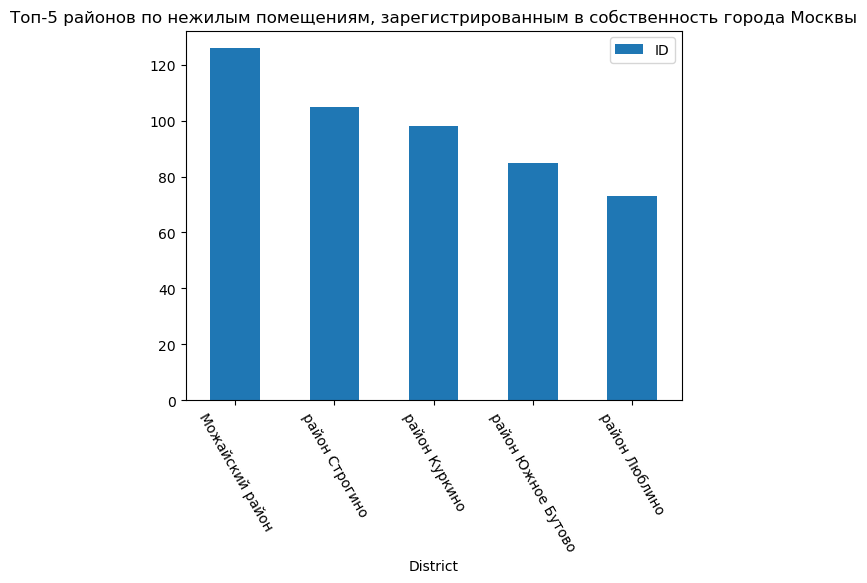

In [34]:
df1.plot(kind='bar')
plt.xticks(rotation=-60)
plt.title('Топ-5 районов по нежилым помещениям, зарегистрированным в собственность города Москвы')
plt.show()

In [48]:
df2 = df.pivot_table(index='BuiltYear', values='ID', aggfunc='count').sort_values(by='ID', ascending=False).head()
df2

,ID
BuiltYear,
2011,426
2010,257
2014,105
2012,77
2013,49


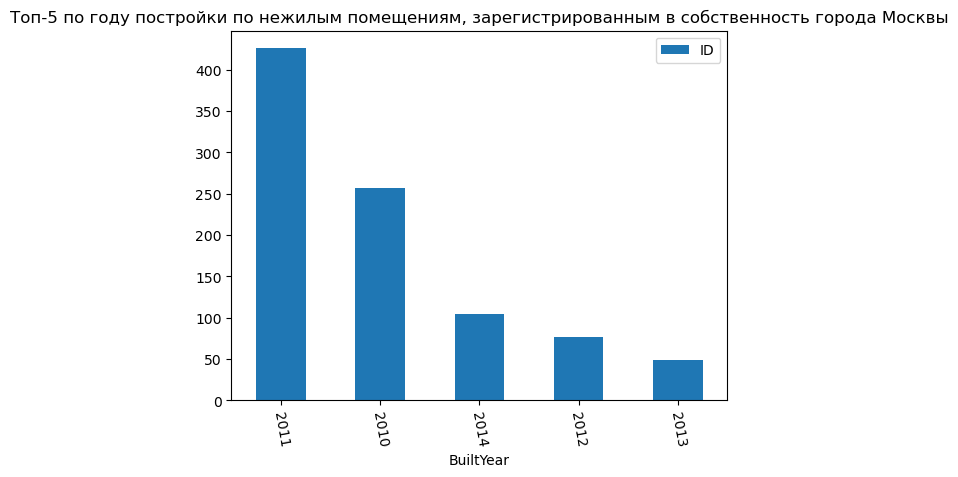

In [49]:
df2.plot(kind='bar')
plt.xticks(rotation=-80)
plt.title('Топ-5 по году постройки по нежилым помещениям, зарегистрированным в собственность города Москвы')
plt.show()

In [50]:
df3 = df.pivot_table(index='AdmArea', values='ID', aggfunc='count').sort_values(by='ID', ascending=False)
df3

,ID
AdmArea,
Северо-Западный административный округ,233
Западный административный округ,216
Юго-Восточный административный округ,140
Зеленоградский административный округ,119
Юго-Западный административный округ,115
Северо-Восточный административный округ,45
Северный административный округ,43
Южный административный округ,42
Центральный административный округ,40


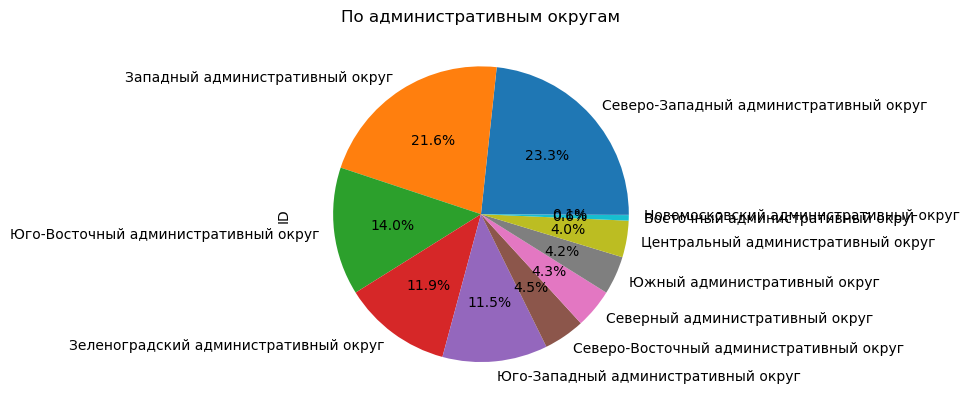

In [66]:
df3.plot(kind='pie', subplots=True, legend=False, autopct='%1.1f%%')
plt.title('По административным округам')
plt.show()